# Лабораторная №5. Кластеризация

#### Imports

In [252]:
import sklearn.datasets as datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans, DBSCAN
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [253]:
dataset = datasets.load_wine(as_frame=True)
df = dataset.frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [254]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [255]:
target = df.target
df = df.drop(columns=["target"])

In [256]:
df_norm = StandardScaler().fit_transform(df)

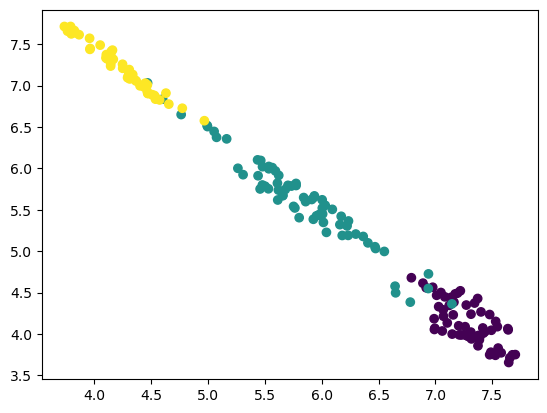

In [257]:
um = umap.UMAP(n_components=20, min_dist=0.3)
u = um.fit_transform(df_norm)
plt.scatter(u[:,0], u[:,1],c = target)
plt.show()

### KMeans

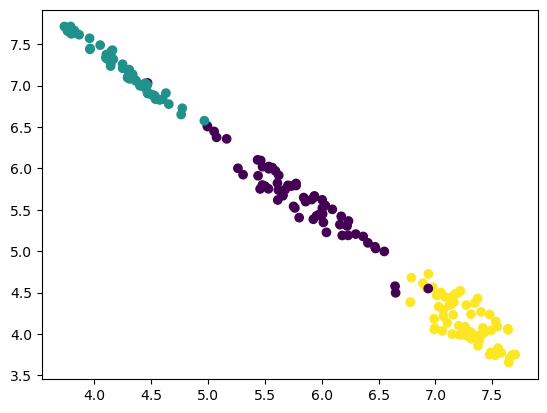

In [258]:
kmeans = KMeans(n_clusters=3, random_state=42).fit_predict(df_norm)
plt.scatter(u[:,0], u[:,1], c = kmeans)
plt.show()

### DBSCAN

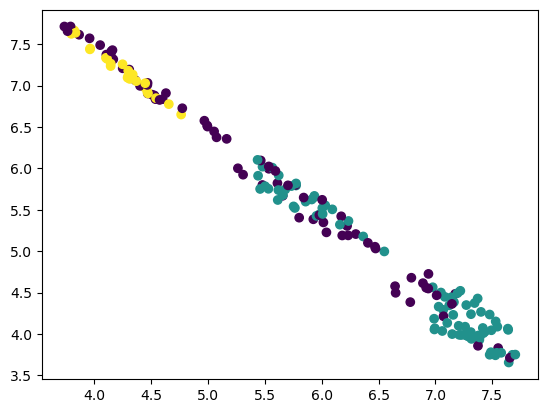

In [268]:
dbscan = DBSCAN(eps=2.28, min_samples=10).fit_predict(df_norm)
plt.scatter(u[:,0], u[:,1], c = dbscan)
plt.show()

### Metrics
Outer - Rand score   
Inner - silhouette score

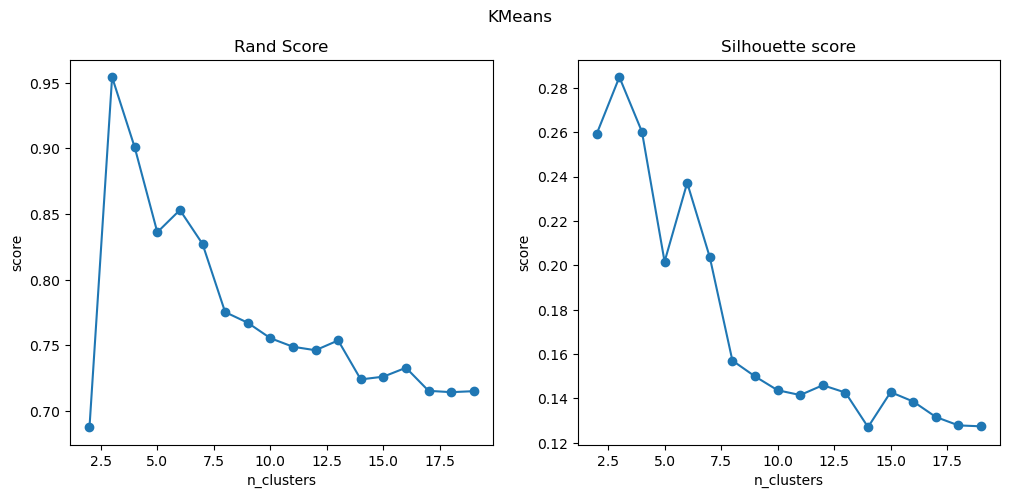

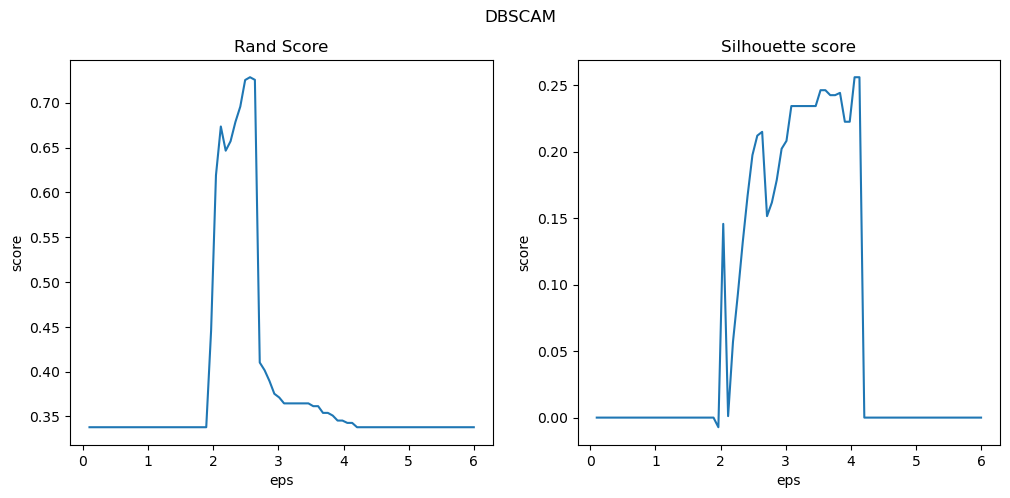

In [270]:
metrics_list = [
    ('Rand Score', lambda res: metrics.rand_score(target, res)),
    ('Silhouette score', lambda res: metrics.silhouette_score(df_norm, res) if len(np.unique(res)) > 1 and len(np.unique(res)) < len(df_norm) else 0.0)
]
for algo_name, algo, space in [
    ('KMeans', lambda x: KMeans(n_clusters=x, random_state=42).fit_predict(df_norm), range(2,20)),
    ('DBSCAM', lambda x: DBSCAN(eps=x, min_samples=10).fit_predict(df_norm), np.linspace(0.1,6.,80))
]:
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(12,5)
    fig.suptitle(algo_name)
    for (metric_name, metric), ax in zip(metrics_list,axs):
        res = [algo(x) for x in space]
        ax.plot(space, [metric(r) for r in res],'-o' if algo_name == 'KMeans' else '')
        ax.set_xlabel('n_clusters' if algo_name == "KMeans" else "eps")
        ax.set_ylabel('score')
        ax.set_title(metric_name)
    plt.show()
